<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/face_preporcessing%26bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob

img_dir = glob.glob('drive/My Drive/Datasets/UTKFace/img/*')
img_n = len(img_dir)

print('Total number of image')
print(img_n)

Total number of image
24106


In [2]:
import random

img_list = []
for n in img_dir:
  temp = []
  temp.append(n[36:])
  temp.append(n.split(sep='_')[1])
  temp.append(n.split(sep='_')[2])
  temp.append(n.split(sep='_')[0][36:])
  img_list.append(temp)

rid = random.randint(0, img_n-7)
img_list[rid:rid+6]

[['49_0_0_20170104185843894.jpg', '0', '0', '49'],
 ['35_1_0_20170104171655778.jpg', '1', '0', '35'],
 ['25_1_0_20170104183350805.jpg', '1', '0', '25'],
 ['42_1_0_20170104184036733.jpg', '1', '0', '42'],
 ['50_1_0_20170104165050048.jpg', '1', '0', '50'],
 ['46_1_0_20170104184041597.jpg', '1', '0', '46']]

In [3]:
import pandas as pd

face_data_encoding = pd.DataFrame(img_list,
                                  columns=['File Name', 'Gender', 'Race', 'Age'])

face_data_encoding

,File Name,Gender,Race,Age
0,66_0_1_20170117195116702.jpg,0,1,66
1,65_1_1_20170117193956961.jpg,1,1,65
2,65_1_1_20170117184041200.jpg,1,1,65
3,67_0_1_20170117143355801.jpg,0,1,67
4,67_0_3_20170117134845691.jpg,0,3,67
...,...,...,...,...
24101,56_0_0_20170111202409002.jpg,0,0,56
24102,60_0_0_20170111202420384.jpg,0,0,60
24103,62_0_0_20170111203056771.jpg,0,0,62
24104,58_0_0_20170111203101211.jpg,0,0,58


In [4]:
gender_label = {
    '0': 'Male',
    '1': 'Female'
}

race_label = {
    '0': 'White',
    '1': 'Black',
    '2': 'Yellow',
    '3': 'Brown',
    '4': 'Others' 
}

def decode_gender(d):
  return gender_label[d]

def decode_race(d):
  return race_label[d]

gender = face_data_encoding['Gender'].apply(decode_gender)
rece   = face_data_encoding['Race'].apply(decode_race)

face_data = pd.DataFrame({
    'File Name':face_data_encoding['File Name'],
    'Gender':gender,
    'Race':rece,
    'Age':face_data_encoding['Age']
})

face_data

,File Name,Gender,Race,Age
0,66_0_1_20170117195116702.jpg,Male,Black,66
1,65_1_1_20170117193956961.jpg,Female,Black,65
2,65_1_1_20170117184041200.jpg,Female,Black,65
3,67_0_1_20170117143355801.jpg,Male,Black,67
4,67_0_3_20170117134845691.jpg,Male,Brown,67
...,...,...,...,...
24101,56_0_0_20170111202409002.jpg,Male,White,56
24102,60_0_0_20170111202420384.jpg,Male,White,60
24103,62_0_0_20170111203056771.jpg,Male,White,62
24104,58_0_0_20170111203101211.jpg,Male,White,58


# 資料集調整

* 主要辨識對象為亞洲人：讓資料集亞洲人的數量為其他人的兩倍

* 辨識對象年齡在16~70之間：去除區間以外的資料

* 須注意調整後的男女比例也要接近1:1

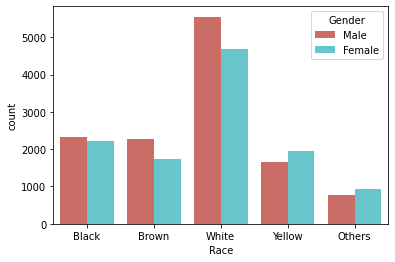

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=face_data['Race'], 
              hue=face_data['Gender'], 
              palette='hls')
plt.show()

In [6]:
"""Remove the age out of range"""

face_data = face_data[face_data['Age'].map(int) < 71]
face_data = face_data[face_data['Age'].map(int) > 15]
len(face_data)

18725

In [7]:
"""Split race"""
import matplotlib.pyplot as plt

face_white  = face_data[face_data['Race'] == 'White' ]
face_black  = face_data[face_data['Race'] == 'Black' ]
face_yellow = face_data[face_data['Race'] == 'Yellow' ]
face_brown  = face_data[face_data['Race'] == 'Brown' ]
face_others = face_data[face_data['Race'] == 'Others' ]

face_yellow

,File Name,Gender,Race,Age
88,31_0_2_20170115205946148.jpg,Male,Yellow,31
96,26_1_2_20170115235521886.jpg,Female,Yellow,26
103,25_1_2_20170116223140371.jpg,Female,Yellow,25
150,60_0_2_20170116235410721.jpg,Male,Yellow,60
197,35_0_2_20170116192510762.jpg,Male,Yellow,35
...,...,...,...,...
23511,62_0_2_20170111203953539.jpg,Male,Yellow,62
23543,68_0_2_20170111205006920.jpg,Male,Yellow,68
23591,65_0_2_20170111205651706.jpg,Male,Yellow,65
23596,66_0_2_20170111205753656.jpg,Male,Yellow,66


In [8]:
"""Shrink data except Asian"""

face_white = face_white.sample(2000)
face_black = face_black.sample(2000)
face_brown = face_brown.sample(2000)

face_white

,File Name,Gender,Race,Age
1166,42_0_0_20170116205352497.jpg,Male,White,42
4243,48_1_0_20170117133139314.jpg,Female,White,48
3813,57_0_0_20170117140047588.jpg,Male,White,57
6367,22_0_0_20170117143335098.jpg,Male,White,22
320,47_0_0_20170119175343739.jpg,Male,White,47
...,...,...,...,...
5638,25_0_0_20170117134007900.jpg,Male,White,25
22280,56_1_0_20170110122655288.jpg,Female,White,56
22261,60_1_0_20170110122544644.jpg,Female,White,60
21753,69_1_0_20170110153425759.jpg,Female,White,69


In [9]:
"""Generate new dataset"""

face_data_train = pd.concat([face_white,
                             face_black,
                             face_yellow,
                             face_brown,
                             face_others],
                            ignore_index=True
                            )

face_data_train

,File Name,Gender,Race,Age
0,42_0_0_20170116205352497.jpg,Male,White,42
1,48_1_0_20170117133139314.jpg,Female,White,48
2,57_0_0_20170117140047588.jpg,Male,White,57
3,22_0_0_20170117143335098.jpg,Male,White,22
4,47_0_0_20170119175343739.jpg,Male,White,47
...,...,...,...,...
9489,63_1_4_20170110180156105.jpg,Female,Others,63
9490,69_1_4_20170110141201824.jpg,Female,Others,69
9491,18_1_4_20170109212430115.jpg,Female,Others,18
9492,19_1_4_20170109192214298.jpg,Female,Others,19


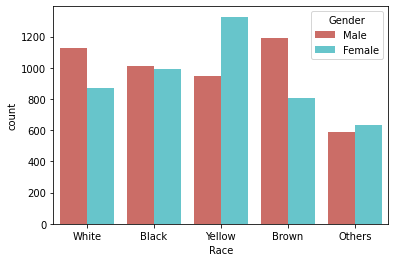

In [10]:
sns.countplot(x=face_data_train['Race'], 
              hue=face_data_train['Gender'], 
              palette='hls')
plt.show()

In [11]:
# save csv
face_data_train.to_csv('face_data_train.csv')

# Bounding Box by OpenCV

In [29]:
"""Random index"""
import numpy as np

rid = random.choices(np.arange(0,9495), k=6)
rid

[2420, 5627, 9483, 5076, 8806, 8319]

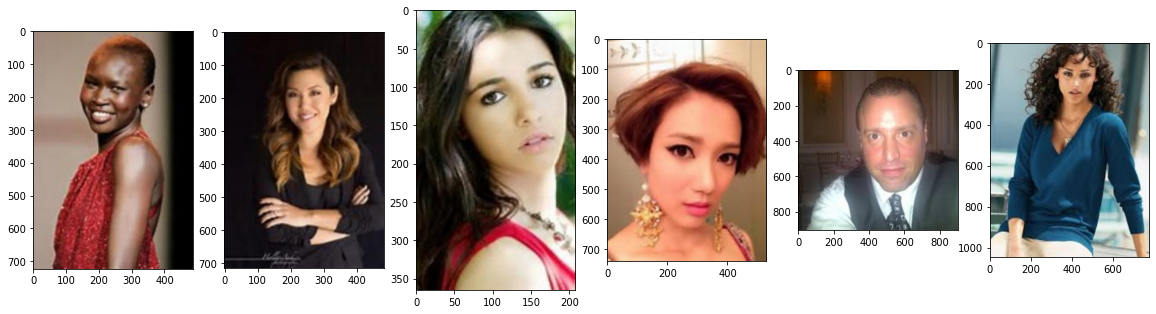

In [30]:
"""Picked images"""
import cv2

fig, ax = plt.subplots(1, 6, figsize=(20,6))

for i in range(6):
  img = cv2.imread('drive/My Drive/Datasets/UTKFace/img/'
                   + face_data_train['File Name'][rid[i]])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[i].imshow(img)

plt.show()

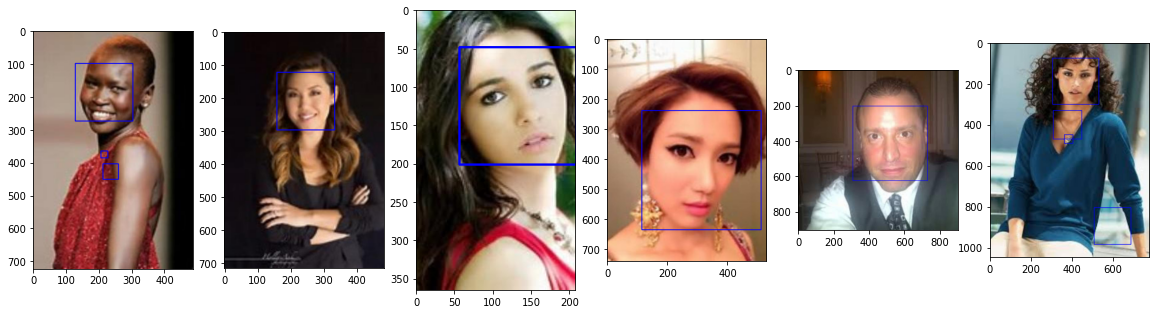

In [31]:
"""Bounding boxes"""
from urllib.request import urlretrieve

url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt2.xml'
urlretrieve(url, 'haarcascade_frontalface_alt2.xml')
hc   = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

fig, ax = plt.subplots(1, 6, figsize=(20,6))

for i in range(6):
  img = cv2.imread('drive/My Drive/Datasets/UTKFace/img/'
                   + face_data_train['File Name'][rid[i]])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  bbox = hc.detectMultiScale(img, minNeighbors=1, minSize=(10,10))
  # bbox
  for x, y, w, h in bbox:
  	cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

  ax[i].imshow(img)

plt.show()


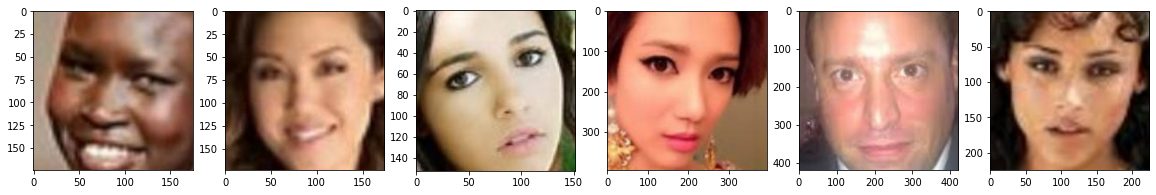

In [32]:
"""Crop"""
fig, ax = plt.subplots(1, 6, figsize=(20,6))

for i in range(6):
  img = cv2.imread('drive/My Drive/Datasets/UTKFace/img/'
                   + face_data_train['File Name'][rid[i]])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  bbox = hc.detectMultiScale(img, minNeighbors=1, minSize=(10,10))
  
  # select the largest bbox
  area = 0
  for x, y, w, h in bbox:
    if w*h > area:
      area = w*h
      (x_, y_, w_, h_) = (x, y, w, h)
      
  ax[i].imshow(img[y_:y_+h_, x_:x_+w_])

plt.show()